# Homework 07
## Brown University
## DATA 1010
## Fall 2020

In [ ]:
using Plots, Distributions

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


## Problem 1

The $p$-value of a hypothesis test is defined to be the smallest significance level $\alpha$ with the property that we would have rejected the null hypothesis with the critical region chosen in the same way. 

(a) Generate 10 observations from a normal distribution with mean 1 and standard deviation 1. These values are to be treated as unknown parameters $\mu$ and $\sigma$ (imagine someone else generated the data and didn't tell you the two values 1 and 1).

Test the hypothesis that the mean of the distribution is positive (null hypothesis: $\mu = 0$, alternative hypothesis: $\mu > 0$). Be sure to use the most appropriate test, given that you know the data are normal but don't know the value of $\sigma$.  Find the $p$-value for this hypothesis test. (You'll want to seed the random number generator, so that your results will be reproducible).

In [ ]:
using Random; Random.seed!(123);

We'll use the sample mean, standardized using the sample variance, as our test statistic. We should use the $t$-test, since we know the data are normally distributed but will have to use the sample variance when we normalize the sample mean. The critical region for a given significance level $\alpha$ is the threshold above which the $t$-distribution (with $10-1=9$ degrees of freedom) has $\alpha$ units of probability mass. So if we want to know the $p$-value, we should find the value of the test statistic and see how much probability mass the $t$-distribution has on the interval from that point to $\infty$. The function that does that is `ccdf`: 

In [ ]:
observations = rand(Normal(1, 1), 10)
ccdf(TDist(9), mean(observations) / (std(observations) / √10))

0.0001956988822889618

The $p$-value is very close to zero, meaning that we can reject the null hypothesis even at a very high confidence level.

(b) Explain why the $p$-value is **not** the conditional probability that the null hypothesis is true given the observed data. Explain why you cannot even answer the question "what is the conditional probability that the null hypothesis is true given the observed data" in part (a). 

Bayes' theorem says that the conditional probability of $H_0$ given the observed data is equal to the probability of $H_0$ and the observed data divided by the probability of the observed data. In this case, we don't have any information about the probability of the observed data. In other words, we lack a *prior*. We'll talk more about this in the Bayesian statistics section.

(c) In part (a), the **effect size** (the difference between $\mu$'s actual value and its value under the null hypothesis) is reasonably large compared to the standard deviation. Would it have been possible to have a comparably small $p$-value even with a much small effect size? Illustrate by example, and conclude your solution with a comment on with a takeaway summary.

Yes, it's possible just by having more data: 

In [ ]:
let
    n = 2000
    observations = rand(Normal(0.1, 1), n)
    ccdf(TDist(n-1), mean(observations) / (std(observations) / √n))
end

3.67126010544299e-5

In this way, $p$-values intermingle two considerations: effect size and test *power*. 

(d) **Challenge question; optional**. For each ordered pair $(n, \mu)$, where $n$ is a positive integer and $\mu$ is a positive real number, we can consider the probability $P$ of rejecting the null hypothesis that $\mu = 0$ given $n$ observations from a normal distribution with mean $\mu$ (at the 95% confidence level, let's say). 

Make a heatmap which shows a plot of $P$ with respect to $\log n$ and $\mu$. 

In [ ]:
# P(n, μ) = 

(e) (not optional) The quantity $P$ in part (d) has a standard name, which we learned in Data Gymansia. What is it? (Answer only; no explanation required.)

This is called **power**.

## Problem 2

When we talked about pseudorandom number generators, we talked about how a random number generator which produces exactly equidistributed data is suspect:

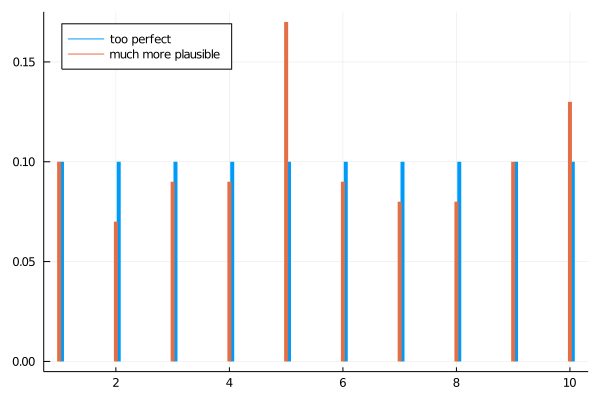

In [ ]:
using StatsBase
Random.seed!(123)
sticks((1:10) .+ 0.05, x -> 1/10, label = "too perfect", linewidth = 4, legend = :topleft)
tallies = countmap(rand(1:10, 100))
sticks!(1:10, x -> tallies[x]/100, label = "much more plausible", linewidth = 4)

At the time, we had to appeal to common sense, but we're now in a position to test the hypothesis that a collection of data are drawn independently from a discrete uniform distribution. 

Suppose the null hypothesis is that the data are drawn from $\{1, 2, \ldots, k\}$, with probability masses $p_1, \ldots, p_k$, respectively. Suppose that we have $n$ observations, and for each $j$ from 1 to $k$, suppose that $X_j$ is the number of $j$'s that we saw among our observations (these are the heights in the stick plot above). Consider the test statistic

$$T = \frac{(X_1 - np_1)^2}{np_1} + \frac{(X_2 - np_2)^2}{np_2} + \cdots + \frac{(X_k - np_k)^2}{np_k}$$.

Pearson's $\chi^2$ test says that the distribution of $T$ is approximately $\chi^2_{k-1}$.

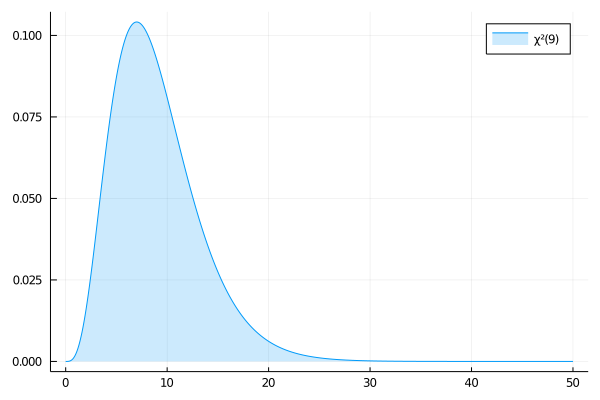

In [ ]:
χ²_plot = plot(0:0.01:50, x -> pdf(Chisq(9), x), 
               fillrange = 0, fillopacity = 0.2, label = "χ²(9)")

Draw two vertical lines showing the values of $T$ for the two datasets plotted above (the uniform one, and the one generated by Julia's PRNG). 

(a) Show that you reject the null hypothesis (at 95% confidence, let's say) in the case of the equidistributed data, but not in the case of the data produced by Julia's RNG. Determine the critical region in a *two-sided* way, particularly so that the critical region includes the 2.5% quantile and below, together with the 97.5% quantile and above.

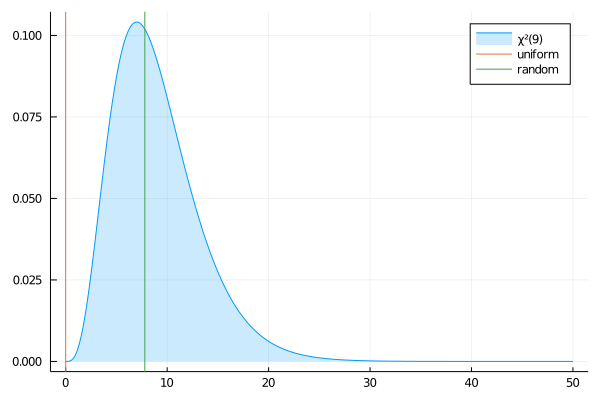

In [ ]:
vline!(χ²_plot, [0 sum((get(tallies,k,0) - 10)^2/10 for k in 1:10)], label = ["uniform" "random"])

Following the suggestion, here's are the thresholds for the critical region:

In [ ]:
quantile(Chisq(9), 0.025), quantile(Chisq(9), 0.975)

(2.7003894999803575, 19.022767798641635)

As was already obvious from the figure, zero falls outside this interval (the test statistic for the perfectly uniform data), while the statistic computed from the data from the Julia PRNG does not.

(b) Provide empirical support for the Pearson $\chi^2$ $t$-test in this instance by comparing the distribution plotted above with histogram showing the distribution of the value of $T$ over 100,000 trials (where each trail involves drawing 100 independent random values from `1:10`).

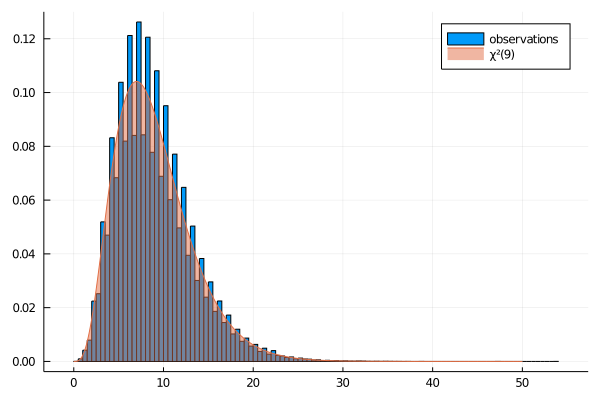

In [ ]:
function sampleT()
    tallies = countmap(rand(1:10, 100))
    sum((get(tallies,k,0) - 10)^2/10 for k in 1:10)
end
histogram([sampleT() for _ in 1:100_000], label = "observations", normed = true)
plot!(0:0.01:50, x -> pdf(Chisq(9), x), fillrange = 0, fillopacity = 0.5, label = "χ²(9)")

## Problem 3

In this probability question, we'll use the permutation test to explore the role of baseline participation rates on elite representation.

Consider a population of size 1000 which is divided into two groups, one of size 900 and the other of size 100. Suppose that each individual has a skill level which is represented by a random variable distributed uniformly on $[0,1]$ (with these random variables independent). Let's define a random variable $N$ so that the $N$ most skilled individuals in the overall population are from the larger subgroup.

(a) Estimate the distribution of $N$ by simulation.

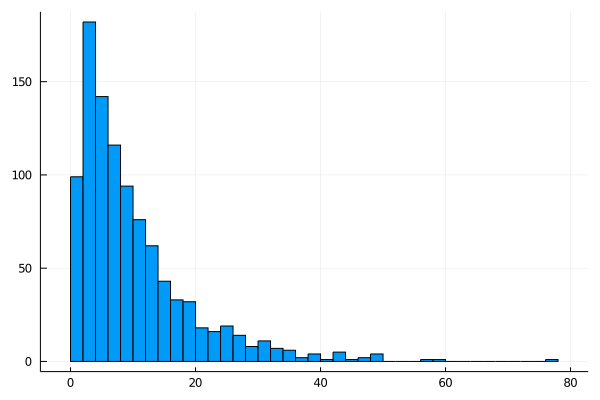

In [ ]:
using Random
histogram([findfirst(x -> x ≤ 100, randperm(1000)) for _ in 1:1000], label = "")

(b) Find the exact value of $\mathbb{P}(N > 10)$.

The event in question occurs if and only if the top person is from the larger group, the second person is from the larger group, etc., up to the tenth person. This has probability $900/1000 \cdot 899 / 900 \cdot \cdots \cdot 891/901$. This works out to: 

In [ ]:
prod([(big(900)-n)//(1000-n) for n in 0:9])

12282806030300814294//35404510814780942585

In [ ]:
float(ans)

0.3469277147920059853083495878773992612397782234147808691533402385745739600124345

In other words, the fact that the larger group has all of the top 10 individuals is very weak evidence of a skill difference. 

## Problem 4

Devise a hypothesis test which uses the DKW inequality to test the null hypothesis that a given collection of observations comes from a standard normal distribution. Be sure to identify your test statistic, critical region, etc. You should do this symbolically, but feel to show a numerical example if you feel that it would help clarify your explanation.

## Problem 5

In class on 10-26, we talked about a simple example (predicting shoe size from height in cm and height in inches) demonstrating how a linear model can very badly overfit.

In class we visualized the overfitting by conceiving of the prediction function as a function of a single variable, namely the height in inches, with the other feature being derived from that one by converting and then rounding.

Visualize the prediction function by instead drawing a *heatmap* of the prediction for a given pair of height values. Plot a subset of the plane consisting of the *feasible* region (wherein the two height measures are compatible, taking rounding into account). Use your diagram to explain what the linear model is doing to overfit the data.

Note that you might need to change the centimeter column from nearest-millimeter rounding to nearest-centimeter rounding. Otherwise the detail is going to be hard to see in the diagram.

## Problem 6

(a) Using the [Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), perform a QDA on features RM and DIS, with labels being whether median value of owner-occupied homes in exceed 25,000 dollars. You should not use all your data points when you are building your model; test the accuracy of your model with the unused datapoints. Randomly assign 80% of the observations to use for training and the remaining 20% for testing.

You should do this directly, by computing the relevant $\mu$ and $\Sigma$ estimates and computing the multivariate Gaussian densities. Do not look for a library to do it for you (that would probably be more work anyway).

(b) Build a QDA model using all of the columns provided. Does this new model yield better accuracy?

You can load this dataset from the [MLDatasets package](https://github.com/JuliaML/MLDatasets.jl) in Julia.a

In [ ]:
using MLDatasets

In [ ]:
?BostonHousing

search: BostonHousing



Boston Housing Dataset.

Sources:    (a) Origin:  This dataset was taken from the StatLib library which is                 maintained at Carnegie Mellon University.    (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the                   demand for clean air', J. Environ. Economics & Management,                  vol.5, 81-102, 1978.    (c) Date: July 7, 1993

Number of Instances: 506

Number of Attributes: 13 continuous attributes (including target                             attribute "MEDV"), 1 binary-valued attribute.

Features:        1. CRIM      per capita crime rate by town        2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.        3. INDUS     proportion of non-retail business acres per town        4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)        5. NOX       nitric oxides concentration (parts per 10 million)        6. RM        average number of rooms per dwelling        7. AGE       proportion of owner-occupied units built prior to 1940        8. DIS       weighted distances to five Boston employment centres        9. RAD       index of accessibility to radial highways        10. TAX      full-value property-tax rate per 10,000 dollars        11. PTRATIO  pupil-teacher ratio by town        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        13. LSTAT    % lower status of the population

Target:        14. MEDV     Median value of owner-occupied homes in 1000's of dollars   

Note: Variable #14 seems to be censored at 50.00 (corresponding to a median price of 50,000);  Censoring is suggested by the fact that the highest median price of exactly 50,000 is reported in 16 cases,  while 15 cases have prices between 40,000 and 50,000, with prices rounded to the nearest hundred.  Harrison and Rubinfeld do not mention any censoring.

The data file stored in this repo is a copy of the This is a copy of UCI ML housing dataset.  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

## Interface

  * [`BostonHousing.features`](@ref)
  * [`BostonHousing.targets`](@ref)
  * [`feature_names`](@ref)


In [ ]:
X, y = BostonHousing.features(), BostonHousing.targets()
# MLDatasets returns data which are transposed relative to the usual 
# "observations by features" format. So we permute the dimensions:
X = permutedims(X, (2, 1)) 
y = y[:]; # same for y as well

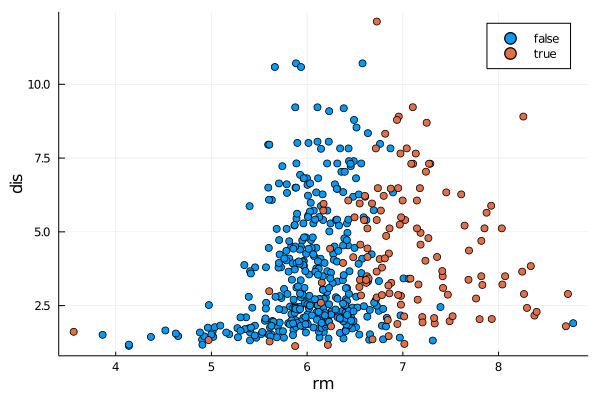

In [ ]:
using Plots
scatter(X[:, 6], X[:, 8], group = y .> 25, xlabel = "rm", ylabel = "dis")